In [15]:
import pickle
from strategy import *
from n_and_c_game_dependents import *
from game import *
from n_and_c_params import *

In [16]:
with open("learning_strategies.pkl", "rb") as file:
    strategies = pickle.load(file)
    
strategy_x, strategy_o = strategies
strategy_x.p.learning = False
strategy_o.p.learning = False
strategy_random = RandomStrategy()

In [17]:
len(strategy_x.states[PureState([['-', '-', '-'], ['-', '-', '-'], ['-', '-', '-']])].history)

50000

In [18]:
strategy_x.p

StrategyParams(start_q=0.3, learning_rate=0.1, discount_rate=0.2, epsilon_decay_rate=0.0, minimum_epsilon=0.4, next_state_is_predictable=False, predictive=True, learning=False, keep_log=True)

In [19]:
strategy_o.p

StrategyParams(start_q=-0.3, learning_rate=0.1, discount_rate=0.2, epsilon_decay_rate=0.0, minimum_epsilon=0.4, next_state_is_predictable=False, predictive=True, learning=False, keep_log=True)

In [20]:
N = 5000
x_win = 0
o_win = 0
draw = 0

for _ in range(N):
#     game = Game(2, [strategy_x, strategy_random])
    game = Game(2, [strategy_random, strategy_o])
    game.play(narrate=False, explain=False)
    if game.data.winner == "x":
        x_win += 1
    elif game.data.winner == "o":
        o_win += 1
    else:
        draw += 1

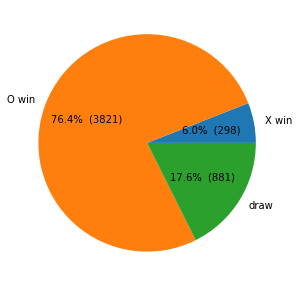

In [21]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig = plt.figure(figsize=(5, 5))
values = [x_win, o_win, draw]
# plt.title("Game results \nX: random \nO: learning strategy with 10,000 epochs")
plt.pie(values, labels=["X win", "O win", "draw"], autopct=make_autopct(values), radius=1)
plt.show()
# fig.savefig("figs/x_100000_vs_random.png")

In [96]:
fig.savefig("best")